### IMPORT LIBRARY DAN BACA DATASET

In [31]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [33]:
# membaca dataset

df = pd.read_csv("play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


### PREPROCESSING DATA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 804.0+ bytes


In [15]:
le = LabelEncoder()
df['outlook'] = le.fit_transform(df['outlook'])
df['temp'] = le.fit_transform(df['temp'])
df['humidity'] = le.fit_transform(df['humidity'])
df['wind'] = le.fit_transform(df['wind'])

print(df['outlook'].unique())
print(df['temp'].unique())
print(df['humidity'].unique())
print(df['wind'].unique())

for i, label in enumerate(le.classes_):
    print(f"{i} = {label}")

[2 0 1]
[1 2 0]
[0 1]
[1 0]
0 = 0
1 = 1


In [17]:
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,No
1,D2,2,1,0,0,No
2,D3,0,1,0,1,Yes
3,D4,1,2,0,1,Yes
4,D5,1,0,1,1,Yes
5,D6,1,0,1,0,No
6,D7,0,0,1,0,Yes
7,D8,2,2,0,1,No
8,D9,2,0,1,1,Yes
9,D10,1,2,1,1,Yes


### TRAIN-TEST SPLIT

In [19]:
X = df.drop(['day', 'play'], axis=1)
y = df['play']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=0)

### TRAIN DATA

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### VISUALISASI DECISION TREE

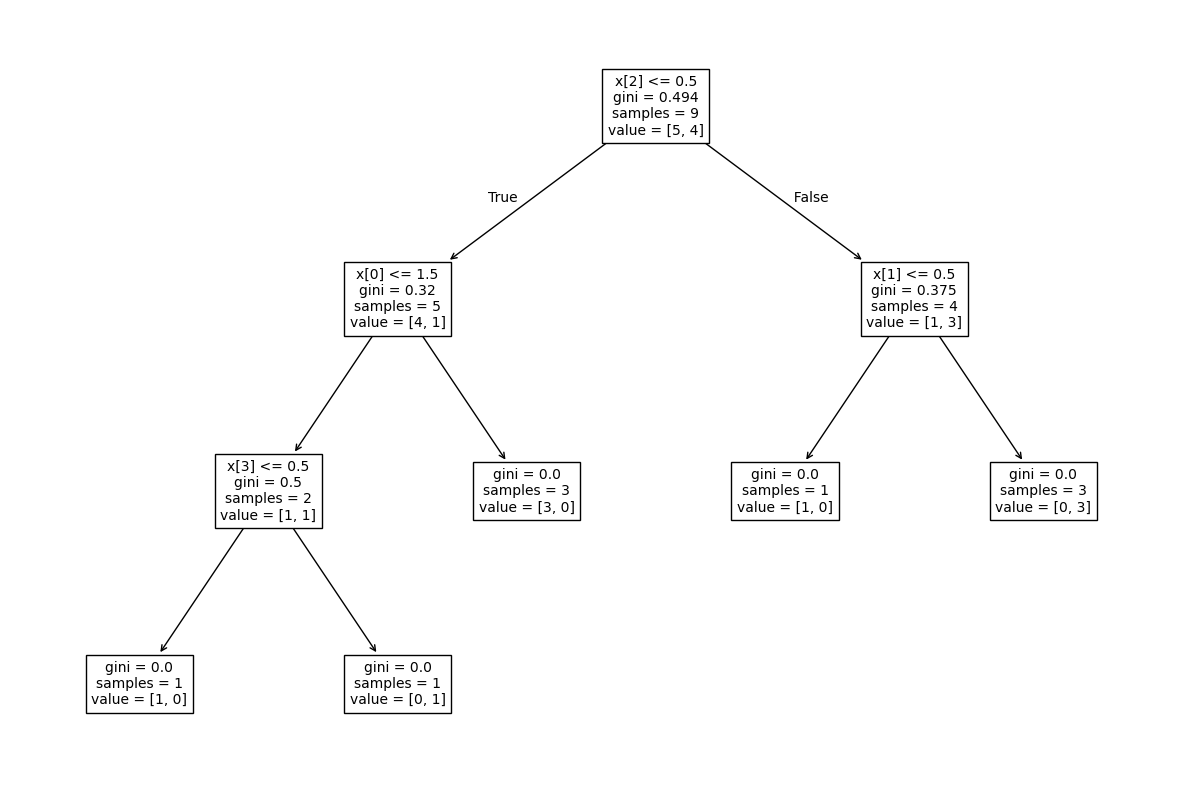

In [25]:
from sklearn import tree
plt.subplots(figsize = (15,10))
tree.plot_tree(classifier, fontsize = 10)
plt.show()

### TEST DATA & CARI AKURASI

In [27]:
depth = classifier.get_depth()
depth

3

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
akurasi

0.2